<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/NYC_Airbnb/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New_York/AB_NYC_2019.csv')

In [161]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

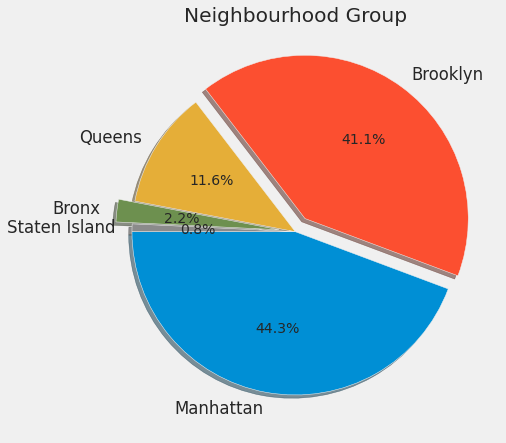

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df['neighbourhood_group'].value_counts(), labels=df['neighbourhood_group'].value_counts().index,autopct='%1.1f%%', startangle=180,explode=[0,0.1,0,0.1,0],shadow=True)
plt.show()

#1. Neighborhood_group vs Price

In [ ]:
df[['neighbourhood_group','price']].groupby(['neighbourhood_group']).count()

,price
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

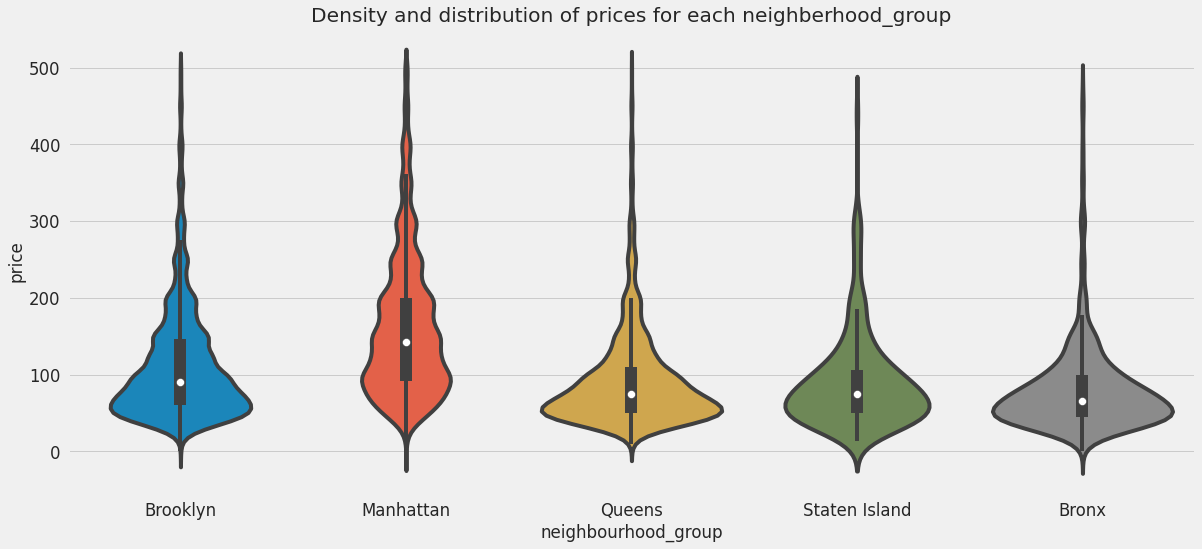

In [ ]:
df_p = df[df['price']<500]
f, ax= plt.subplots(1, 1, figsize=(18,8))
#using violinplot to showcase density and distribtuion of prices 
sns.violinplot(x='neighbourhood_group',y='price',data=df_p,ax=ax )
ax.set_title('Density and distribution of prices for each neighberhood_group')

No handles with labels found to put in legend.


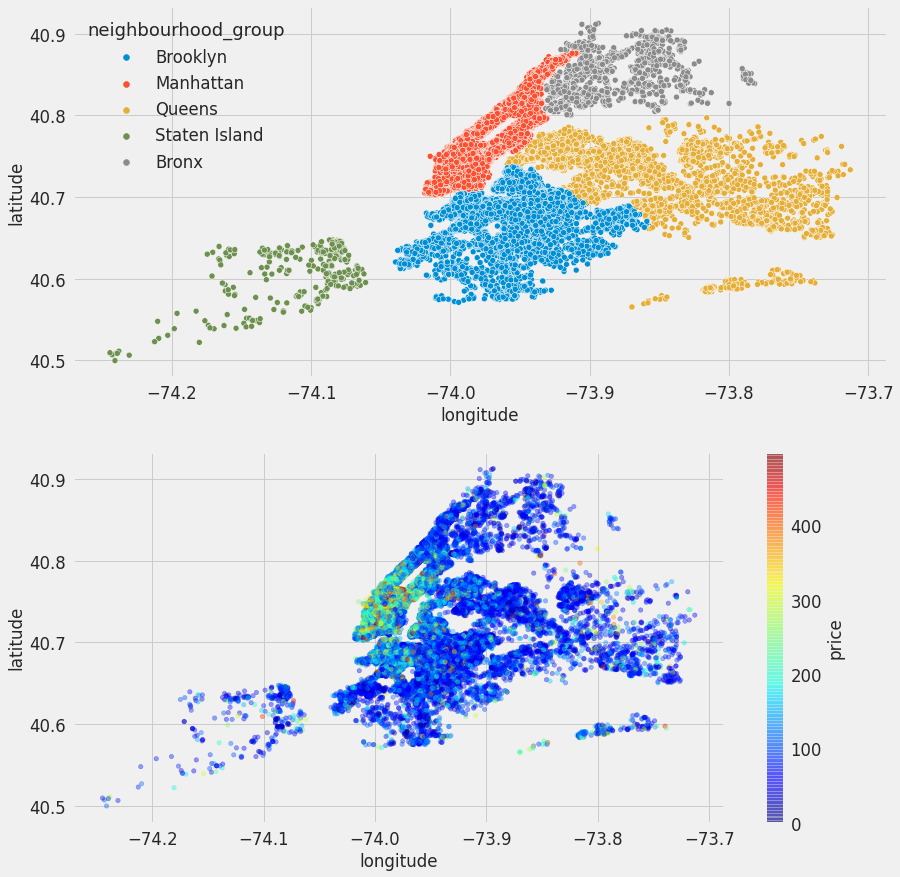

In [ ]:
title = 'Neighbourhood Group Location'
f, ax = plt.subplots(2,1,figsize=(13,14))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group'],ax=ax[0])
plt.ioff()
df_p.plot(kind='scatter',x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,ax=ax[1])
ax[1].legend()

# Relation to price

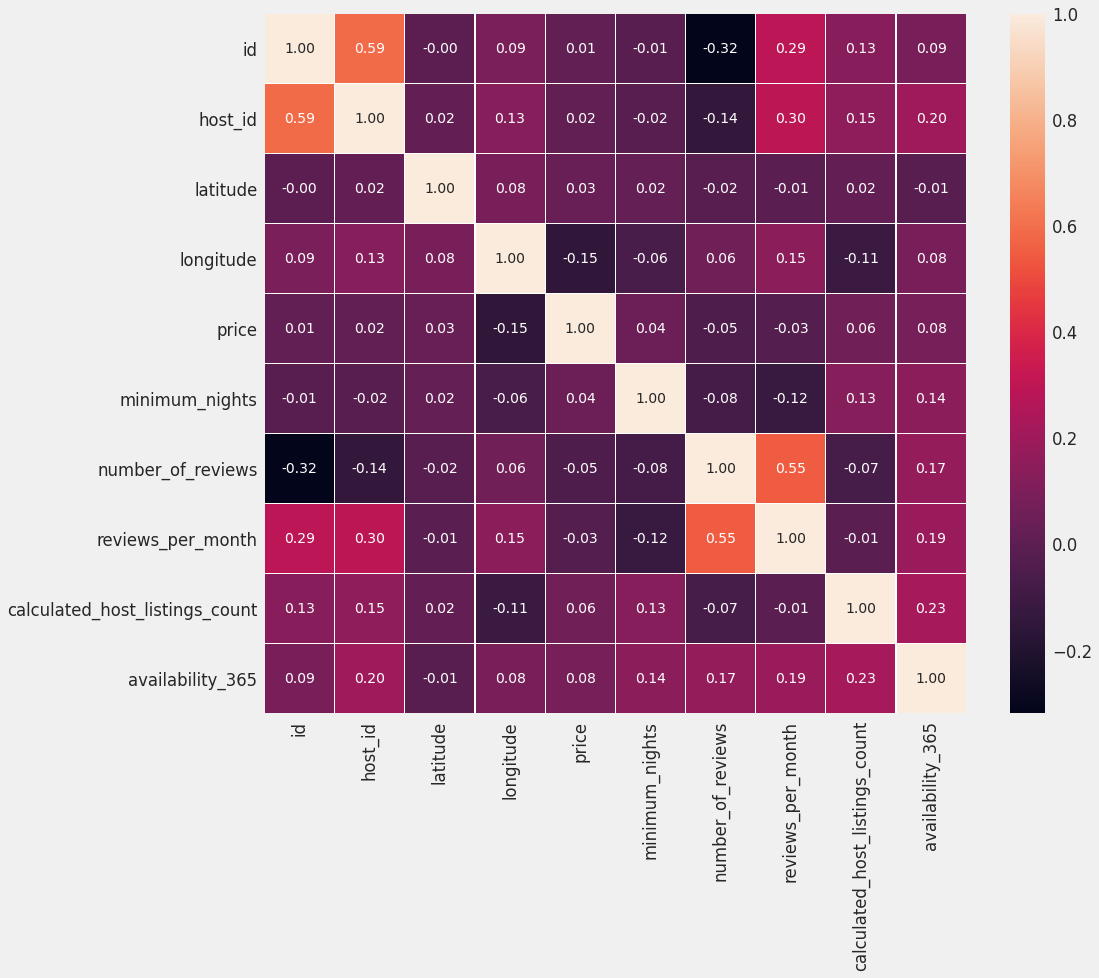

In [162]:
plt.figure(figsize=(14,12))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.1)


# Most used word for 'name'

In [165]:
_names_=[]

for name in df['name']:
  _names_.append(name)

def split_name(name):
  spl=str(name).split()
  return spl

_names_for_count_=[]

for x in _names_:
  for word in split_name(x):
    word=word.lower()
    _names_for_count_.append(word)

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 'skylit',
 'midtown',
 'castle',
 'the',
 'village',
 'of',
 'harlem....new',
 'york',
 '!',
 'cozy',
 'entire',
 'floor',
 'of',
 'brownstone',
 'entire',
 'apt:',
 'spacious',
 'studio/loft',
 'by',
 'central',
 'park',
 'large',
 'cozy',
 '1',
 'br',
 'apartment',
 'in',
 'midtown',
 'east',
 'blissartsspace!',
 'large',
 'furnished',
 'room',
 'near',
 "b'way",
 'cozy',
 'clean',
 'guest',
 'room',
 '-',
 'family',
 'apt',
 'cute',
 '&',
 'cozy',
 'lower',
 'east',
 'side',
 '1',
 'bdrm',
 'beautiful',
 '1br',
 'on',
 'upper',
 'west',
 'side',
 'central',
 'manhattan/near',
 'broadway',
 'lovely',
 'room',
 '1,',
 'garden,',
 'best',
 'area,',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'in',
 'manhattan',
 'for',
 'singles',
 'west',
 'village',
 'nest',
 '-',
 'superhost',
 'only',
 '2',
 'stops',
 'to',
 'manhattan',
 'studio',
 'perfect',
 'for',
 'your',
 'parents',
 '+',
 'garden',
 'chelsea',


In [166]:
from collections import Counter

_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[:25]

In [168]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words',1:'Count'},inplace=True)
sub_w

,Words,Count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113
5,cozy,4634
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3629


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

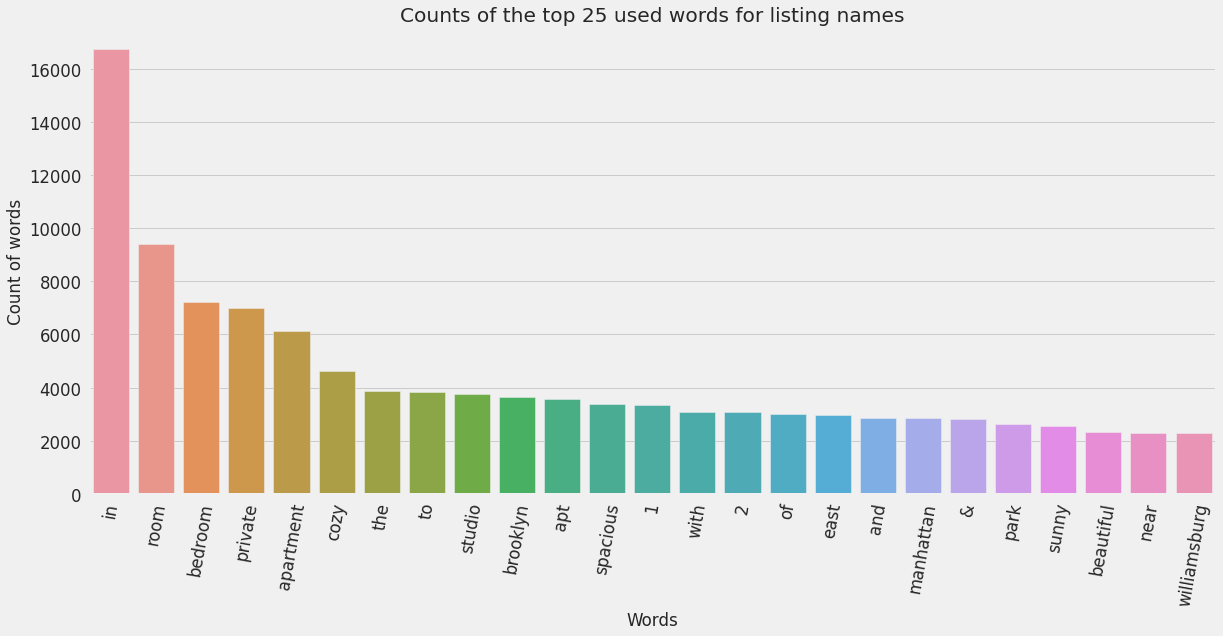

In [191]:
f, ax= plt.subplots(1,1, figsize=(18,8))
sns.barplot(data=sub_w ,x='Words',y='Count',ax=ax)
ax.set_title('Counts of the top 25 used words for listing names')
ax.set_ylabel('Count of words')
ax.set_xlabel('Words')
ax.set_xticklabels(viz_5.get_xticklabels(), rotation=80)